- Import libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

- Import data

In [2]:
# wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
car_df = pd.read_csv('data/car_fuel_efficiency.csv', sep=',')
display(car_df.head(3))
display(car_df.shape)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341


(9704, 11)

In [3]:
display(car_df.info())
work_df = car_df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
display(work_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


None

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341


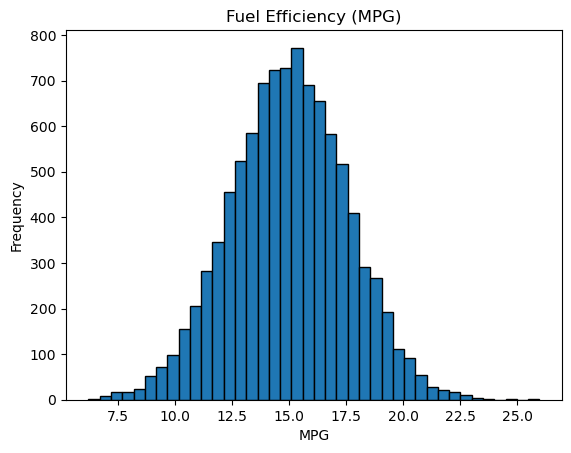

In [4]:
plt.hist(car_df['fuel_efficiency_mpg'], 
         bins=40, 
         edgecolor='black')
plt.title('Fuel Efficiency (MPG)')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

#### Question 1
- First, display columns and their missing observations
- Second, keep columns with missing observation

In [5]:
display(work_df.isnull().sum())
missing_col = work_df.columns[work_df.isnull().any()].tolist()
display(missing_col)

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

['horsepower']

#### Question 2
- Median for the variable `horsepower`

In [6]:
display(work_df['horsepower'].median())

149.0

#### Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

##### Attempt 1: Fill missing values with zeros

In [7]:
# Fill columns with missing values with zeros
car_df_zero = work_df.copy()
car_df_zero['horsepower'] = car_df_zero['horsepower'].fillna(0)

In [8]:
# Shuffle with seed 42
# frac=1.0 → take 100% of the rows (so you get all rows, but shuffled).
# reset_index() → creates a new, clean index (0, 1, 2, …) for the DataFrame. drop=True → tells Pandas not to keep that old index column — it’s discarded instead of added as a column.
data_shuffled = car_df_zero.sample(frac=1.0, random_state=42).reset_index(drop=True)

# 60/20/20 split
n = len(data_shuffled)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

train_df = data_shuffled.iloc[:n_train].copy()
val_df   = data_shuffled.iloc[n_train:n_train+n_val].copy()
test_df  = data_shuffled.iloc[n_train+n_val:].copy()

In [9]:
# Let's print the dimension of the datasets
print(f'Train shape: {train_df.shape}')
print(f'Validation shape: {val_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (5822, 5)
Validation shape: (1940, 5)
Test shape: (1942, 5)


In [10]:
# Split the dataset into observation matrix X (features) and target vector y
X_train = train_df.drop('fuel_efficiency_mpg', axis=1)
y_train = train_df['fuel_efficiency_mpg']

X_valid = val_df.drop('fuel_efficiency_mpg', axis=1)
y_valid = val_df['fuel_efficiency_mpg']

X_test = test_df.drop('fuel_efficiency_mpg', axis=1)
y_test = test_df['fuel_efficiency_mpg']

In [11]:
# Train and evaluate
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_valid_pred = lr.predict(X_valid)
y_test_pred = lr.predict(X_test)

print(f'Train RMSE: {np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)):.2f}')
print(f'Validation RMSE: {np.sqrt(metrics.mean_squared_error(y_valid_pred, y_valid)):.2f}')
print(f'Test RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)):.2f}')

Train RMSE: 0.52
Validation RMSE: 0.52
Test RMSE: 0.52


##### Attempt 2: Fill missing values with average of `horsepower`

In [12]:
# Shuffle with seed 42
# frac=1.0 → take 100% of the rows (so you get all rows, but shuffled).
# reset_index() → creates a new, clean index (0, 1, 2, …) for the DataFrame. drop=True → tells Pandas not to keep that old index column — it’s discarded instead of added as a column.
data_shuffled = work_df.sample(frac=1.0, random_state=42).reset_index(drop=True)

# 60/20/20 split
n = len(data_shuffled)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

train_df = data_shuffled.iloc[:n_train].copy()
val_df   = data_shuffled.iloc[n_train:n_train+n_val].copy()
test_df  = data_shuffled.iloc[n_train+n_val:].copy()

- Replace missing values

In [13]:
mean_power = train_df['horsepower'].mean()
train_df['horsepower'] = train_df['horsepower'].fillna(mean_power)
val_df['horsepower'] = val_df['horsepower'].fillna(mean_power)
test_df['horsepower'] = test_df['horsepower'].fillna(mean_power)

In [14]:
# Split the dataset into observation matrix X (features) and target vector y
X_train = train_df.drop('fuel_efficiency_mpg', axis=1)
y_train = train_df['fuel_efficiency_mpg']

X_valid = val_df.drop('fuel_efficiency_mpg', axis=1)
y_valid = val_df['fuel_efficiency_mpg']

X_test = test_df.drop('fuel_efficiency_mpg', axis=1)
y_test = test_df['fuel_efficiency_mpg']

In [15]:
# Train and evaluate
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_valid_pred = lr.predict(X_valid)
y_test_pred = lr.predict(X_test)

print(f'Train RMSE: {np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)):.2f}')
print(f'Validation RMSE: {np.sqrt(metrics.mean_squared_error(y_valid_pred, y_valid)):.2f}')
print(f'Test RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)):.2f}')

Train RMSE: 0.46
Validation RMSE: 0.46
Test RMSE: 0.46


> RMSE is lower when we fill missing values with zeros

#### Question 4

Now let's train a **regularized linear regression**.

- Fill missing values (NAs) with **0**.  
- Try different values of **r** from this list: **[0, 0.01, 0.1, 1, 5, 10, 100]**.  
- Use **RMSE** to evaluate the model on the **validation** dataset.  
- **Round** RMSE scores to **2 decimal** digits.  
- Which **r** gives the **best RMSE**?  
  - If multiple options give the same best RMSE, select the **smallest r**.

**Options:**
- 0  
- 0.01  
- 1  
- 10  
- 100


In [34]:
# Fill columns with missing values with zeros
car_df_zero = work_df.copy()
car_df_zero['horsepower'] = car_df_zero['horsepower'].fillna(0)

# Shuffle with seed 42
# frac=1.0 → take 100% of the rows (so you get all rows, but shuffled).
# reset_index() → creates a new, clean index (0, 1, 2, …) for the DataFrame. drop=True → tells Pandas not to keep that old index column — it’s discarded instead of added as a column.
data_shuffled = car_df_zero.sample(frac=1.0, random_state=42).reset_index(drop=True)

# 60/20/20 split
n = len(data_shuffled)
n_train = int(n*0.6)
n_val = int(n*0.2)
n_test = n - n_train - n_val

train_df = data_shuffled.iloc[:n_train].copy()
val_df = data_shuffled.iloc[n_train:n_train+n_val].copy()
test_df = data_shuffled.iloc[n_train+n_val:].copy()

In [35]:
# Split the dataset into observation matrix X (features) and target vector y
X_train = train_df.drop('fuel_efficiency_mpg', axis=1)
y_train = train_df['fuel_efficiency_mpg']

X_valid = val_df.drop('fuel_efficiency_mpg', axis=1)
y_valid = val_df['fuel_efficiency_mpg']

X_test = test_df.drop('fuel_efficiency_mpg', axis=1)
y_test = test_df['fuel_efficiency_mpg']

In [64]:
# INitialize the scaler
scaler = preprocessing.StandardScaler()

# Fit scaler on the Train set only (learns the scaling parameters from the training data such as mean and std deviation)
scaler.fit(X_train)

# Transform (i.e., standardize) train and test with the same scaler
X_train_scaled = scaler.transform(X_train)
X_valid_scaled  = scaler.transform(X_valid)
X_test_scaled  = scaler.transform(X_test)

In [66]:
# Train and evaluate
alpha_list = [0, 0.01, 0.1, 1, 5, 10, 100]

train_list = []
valid_list = []

for alpha in alpha_list:
    lr = linear_model.Ridge(alpha=alpha)
    lr.fit(X_train_scaled, y_train)
    
    y_train_pred = lr.predict(X_train_scaled)
    y_valid_pred = lr.predict(X_valid_scaled)
    
    train_list.append(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
    valid_list.append(np.sqrt(metrics.mean_squared_error(y_valid, y_valid_pred)))

In [69]:
min_rmse = min(valid_list)
corrsp_alpha = alpha_list[valid_list.index(min_rmse)]
print(f"Best alpha: {corrsp_alpha}")
print(f"Minimum RMSE: {min_rmse:.6f}")

Best alpha: 0
Minimum RMSE: 0.517187
